# Descriptive Statistics: Shape of a distribution (Skewness)

## Skewness

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. The skewness value can be positive, negative, or undefined.

- Normally distributed data has a skewness of zero.
- **Positively skewed** data indicates a right-skewed distribution: more of extremely large values and fewer small ones.

If the mean is greater than the median, the data is positively skewed (Mode < Median < Mean). The outliers are on the right side of the distribution.

*(Synonyms: right-skewed)*

- **Negatively skewed** data: lots of small values and a few extremely large ones.
If the mean is smaller than the median, the data is negatively skewed (Mean < Median < Mode). The outliers are on the left side of the distribution.

*(Synonyms: left-skewed*

#### Skewness formula

$$
\gamma_m = \frac{\frac{1}{n}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{3}}} {\sigma^{3}}
$$

##### Explanation:
- $\gamma_m$: Population skewness symbol
- $(x_i - \bar{x})$ this is the so-called *mean centering*: subtract the mean ($\bar{x}$) from each value in the dataset ($x_i$). Cubing the difference emphasizes larger deviations and preserves the sign (positive or negative).
- $n$: This represents the number of observations or data points in the dataset.
- $\frac{1}{n}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{3}}$: This calculates the average of the cubed differences. It gives us a measure of the asymmetry of the data.
- $\sigma$: standard deviation symbol
- $\sigma^{3}$: This is the standard deviation of the dataset, raised to the power of 3. The standard deviation measures the spread or dispersion of the data points. Raising it to the power of 3 scales it to match the cubed differences.

##### Order of operations:
1. Subtract the mean from each value in the dataset.
2. Cube each difference.
3. Sum the cubed differences.
4. Divide by the number of observations.



##### Standard deviation value formula

$$
\sigma = \frac{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^3}{\left(\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}\right)^3} \
$$

- $\gamma_m > 0$: **positive** skewed (**right**-skewed)
- $\gamma_m < 0$: **negative** skewed (**left**-skewed)
- $\gamma_m = 0$: no skewness (symmetrical distribution)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

plt.style.use('fivethirtyeight')

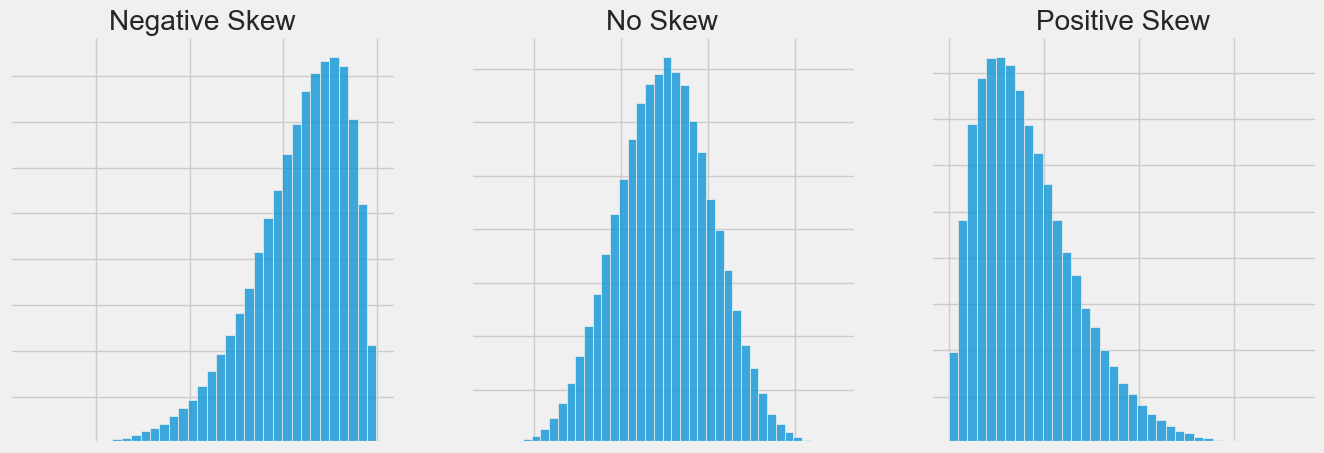

In [4]:
skewness = pd.read_csv('data/skewdata.csv')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data = skewness.loc[skewness['Skew'] == 'NegSkew'], x = 'Values', binwidth = 0.02, ax=axes[0])
ax2 = sns.histplot(data = skewness.loc[skewness['Skew'] == 'NoSkew'], x = 'Values', binwidth = 0.02, ax=axes[1])
ax3 = sns.histplot(data = skewness.loc[skewness['Skew'] == 'PosSkew'], x = 'Values', binwidth = 0.02, ax=axes[2])

axes[0].set_title("Negative Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Positive Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()

### Examples (skewness)

#### Example 1 (skewness)

In [5]:
incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

In [6]:
np.median(incomes), np.mean(incomes)

(np.float64(27005.30853891188), np.float64(127127.7141868306))

In [7]:
df = pd.DataFrame(incomes)
df.skew()

0    100.00467
dtype: float64

#### Calculate skewness using statsmodels

statsmodels will return:
- The standard skewness estimator.
- The skewness estimator based on quartiles.
- The skewness estimator based on mean-median difference, standardized by absolute deviation.
- The skewness estimator based on the mean-median difference, standardized by standard deviation.


In [8]:
sm.stats.stattools.robust_skewness(incomes)

(np.float64(99.98967042267313),
 np.float64(0.008310879516554865),
 np.float64(0.8953172451917037),
 np.float64(0.010013502560209437))

#### Example 2 (skewness)

In [9]:
sp_data = pd.read_csv("data/SP_500_1987.csv", parse_dates=["Date"])
sp_data['Volume'] = sp_data['Volume'].str.replace(',', '').astype(int)
sp_data['Returns'] = sp_data['Close'].pct_change()
sp_data.dropna(inplace=True)
sp_data['Returns'].skew()

np.float64(-4.063006900553241)

In [10]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(np.float64(-4.038782236530137),
 np.float64(0.033689707286255054),
 np.float64(-0.11690104948849872),
 np.float64(-0.06460582304845877))

### Example 3 (skewness)

In [23]:
num_people = [1, 2, 2, 1, 3, 4, 3, 2, 5, 1, 2, 7, 3, 4, 5, 6, 2, 1]
df = pd.DataFrame(num_people)
df.describe()

,0
count,18.00000
mean,3.00000
std,1.81497
min,1.00000
25%,2.00000
50%,2.50000
75%,4.00000
max,7.00000


In [225]:
frequency = df[0].value_counts()
frequency

0
2    5
1    4
3    3
4    2
5    2
7    1
6    1
Name: count, dtype: int64

<BarContainer object of 7 artists>

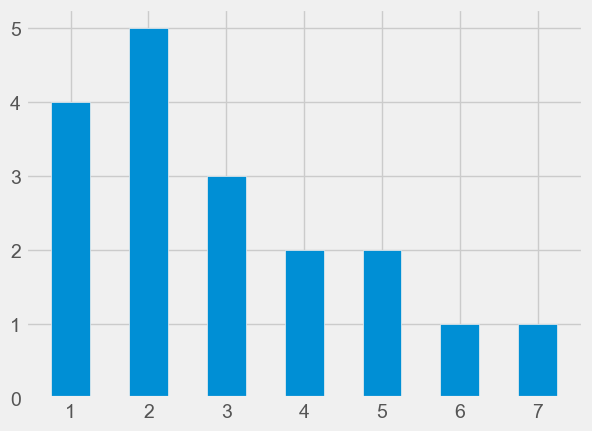

In [226]:
plt.bar(frequency.index, frequency.values, width=0.5)

In [239]:
mean = np.mean(num_people)
median = np.median(num_people)
skewness = pd.DataFrame(num_people).skew()
mode = stats.mode(num_people)
skewness

0    0.796943
dtype: float64

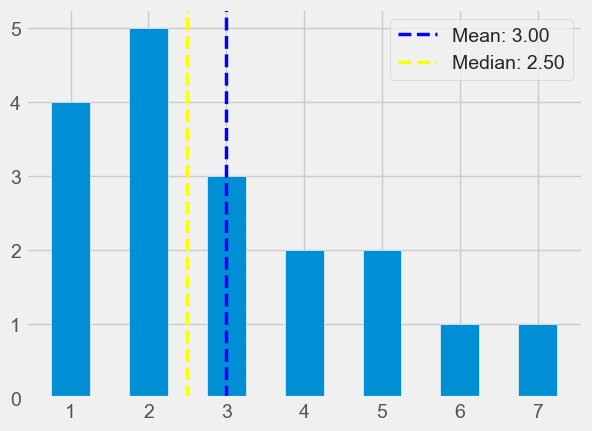

In [236]:
plt.bar(frequency.index, frequency.values, width=0.5)
plt.axvline(x=mean, color='blue', linestyle='--', linewidth=2.5, label=f'Mean: {mean:.2f}')
plt.axvline(x=median, color='yellow', linestyle='--', linewidth=2.5, label=f'Median: {median:.2f}')
plt.legend()
plt.show()

In [238]:
def skewness_type(mean, median):
    if mean > median:
        print("Positively skewed: Mean > Median")
    elif mean < median:
        print("Negatively skewed: Mean < Median")
    else:
        print("No skew: Mean = Median")
skewness_type(mean, median)
print("Mean: ", mean)
print("Median: " , median)
print("Skewness: ", skewness)

Positively skewed: Mean > Median
Mean:  3.0
Median:  2.5
Skewness:  0    0.796943
dtype: float64
